### Part 1 - Introduction

### Concept

* Compute a coefficient for each attribute
* Select a subset of attributes based on the coefficient

### Different methods of computing the coefficient

#### Classification Methods

**`f_classif`**

> Computes ANOVA F-value between each feature and the target (for classification).
> 
> Measures linear dependency; higher F-value means stronger feature importance.

**`mutual_info_classif`**

> Estimates mutual information (dependency) between features and a discrete target.
> 
> Captures non-linear relationships (unlike F-value).

**`chi2`**

> Computes Chi-squared statistic between categorical features and target.
> 
> Only works with non-negative features (e.g., counts, binary data).

#### Regression Methods

**`f_regression`**

> Computes F-value between features and a continuous target.
> 
> Measures linear correlation (similar to Pearson’s correlation).

**`mutual_info_regression`**

> Estimates mutual information between features and a continuous target.
> 
> Detects non-linear dependencies (more general than F-value).

### Different methods of selecting attributes

#### Feature Selection Wrappers

**`SelectKBest`**

> Selects first k features based on scores (e.g., F-value, mutual info).

**`SelectPercentile`**

> Selects top X% of features based on scores.

**`SelectFpr`** (False Positive Rate)

> Selects features with p-values below a threshold (controls false positives).

**`SelectFdr`** (False Discovery Rate)

> Adjusts p-values using Benjamini-Hochberg procedure to limit false discoveries.

**`SelectFwe`** (Family-Wise Error Rate)

> Uses Bonferroni correction to control overall error rate (strict threshold).


### Part 2 - Scikit learn demo
#### Part 2.1 - Base code

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [58]:
# Load and clean data
url = 'https://raw.githubusercontent.com/JohnMount/Penguins/refs/heads/main/penguins_raw.csv'
penguins = pd.read_csv(url).dropna()

print("Nombre d'entrées et nombre de colonnes :")
print(penguins.shape)

# Define X and y
X = penguins.drop(columns=['Species'])
y = penguins['Species']

# Label encode all object columns
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    if X_encoded[col].nunique() > 1:  # Avoid constant features
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])
    else:
        X_encoded.drop(columns=col, inplace=True)  # Drop constant columns

Nombre d'entrées et nombre de colonnes :
(34, 17)


In [59]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with LinearSVC classifier: {accuracy:.3f}")

Accuracy with LinearSVC classifier: 1.000


In [60]:

# Feature selection
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)

scores = -np.log10(selector.pvalues_)
scores /= np.nanmax(scores)

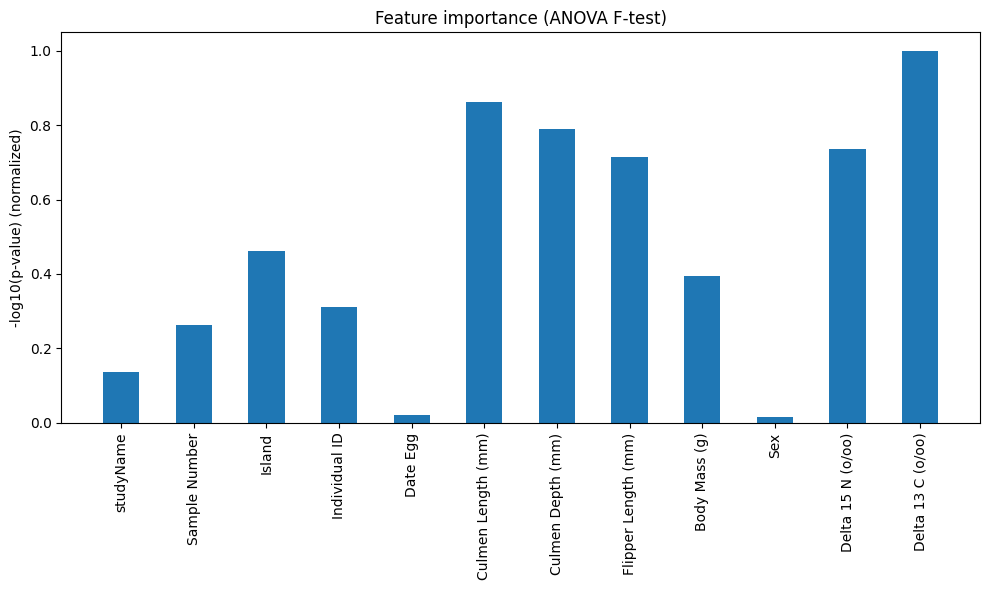

In [61]:
# Plot with feature names
feature_names = X_encoded.columns
plt.figure(figsize=(10, 6))
plt.bar(range(len(scores)), scores, tick_label=feature_names, width=0.5)
plt.xticks(rotation=90)
plt.ylabel("-log10(p-value) (normalized)")
plt.title("Feature importance (ANOVA F-test)")
plt.tight_layout()
plt.show()

In [62]:
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with top 4 features with LinearSVC classifier: {accuracy:.3f}")

Accuracy with top 4 features with LinearSVC classifier: 0.889


#### Part 2.2 - Comparison with different methods